# LAB Sheet - 02 : Use of Pandas for Data Loading and Data Visualisation Tools

### Submitted by: Vatsalya Gupta, SC19B098, B.Tech. ECE VII Semester

We will have a brief overview of some important functionalities within $\texttt{Pandas}$ library. Later, we will explore data loading with different methods and some important data visualisation tools to understand your data better in this LAB sheet.

Note: We use the $\textit{Pima Indians Dataset}$ which is given along with the $\texttt{.ipynb}$ file.

## <font color = 'brown'>Pandas - A Quick Overview</font>


Pandas provides data structures and functionality to quickly manipulate and analyze data. The
key to understanding $\texttt{Pandas}$ for machine learning is understanding the Series and DataFrame data structures.

### Series

A series is a one dimensional array where the rows and columns can be labeled.


In [1]:
# series
import numpy
import pandas
myarray = numpy.array([1, 2, 3])
rownames = ['a', 'b', 'c']
myseries = pandas.Series(myarray, index=rownames)
print(myseries)

a    1
b    2
c    3
dtype: int32


You can access the data in a series like a NumPy array and like a dictionary, for example:

In [2]:
print(myseries[0])
print(myseries['a'])

1
1


### DataFrame

A data frame is a multi-dimensional array where the rows and the columns can be labeled

In [3]:
# dataframe
import numpy
import pandas
myarray = numpy.array([[1, 2, 3], [4, 5, 6]])
rownames = ['a', 'b']
colnames = ['one', 'two', 'three']
mydataframe = pandas.DataFrame(myarray, index=rownames, columns=colnames)
print(mydataframe)


   one  two  three
a    1    2      3
b    4    5      6


In [4]:
# alternatively
data_dic = {'one': [1, 4], 'two': [2, 5], 'three': [3, 6]} 
mydataframe = pandas.DataFrame(data_dic, index = rownames)
print(mydataframe)

   one  two  three
a    1    2      3
b    4    5      6


Data can be index using column names.

In [5]:
mydataframe['one']

a    1
b    4
Name: one, dtype: int64

In [6]:
print('method 1:')
print(mydataframe['one'])
print('method 2:')
print(mydataframe.one)

method 1:
a    1
b    4
Name: one, dtype: int64
method 2:
a    1
b    4
Name: one, dtype: int64


Pandas is a very powerful tool for slicing and dicing your data.

You now know enough syntax and usage information to read and understand Python code for
machine learning and to start creating your own scripts. In the next lesson you will discover
how you can very quickly and easily load standard machine learning datasets in Python.

## <font color = 'brown'>How To Load Machine Learning Data ? </font>

You must be able to load your data before you can start your machine learning project. The
most common format for machine learning data is CSV files. There are a number of ways to
load a CSV file in Python. In this section you will learn three ways that you can use to load
your CSV data in Python:
1. Load CSV Files with the Python Standard Library.
2. Load CSV Files with NumPy.
3. Load CSV Files with Pandas. 

Let’s get started.

###  Considerations When Loading CSV Data

There are a number of considerations when loading your machine learning data from CSV files.
For reference, you can learn a lot about the expectations for CSV files by reviewing  [Common Format and MIME Type for Comma-Separated Values (CSV) Files1
.](https://tools.ietf.org/html/rfc4180)



#### File Header

Does your data have a file header? If so this can help in automatically assigning names to each
column of data. If not, you may need to name your attributes manually. Either way, you should
explicitly specify whether or not your CSV file had a file header when loading your data

#### Comments

Does your data have comments? Comments in a CSV file are indicated by a hash (#) at the
start of a line. If you have comments in your file, depending on the method used to load your
data, you may need to indicate whether or not to expect comments and the character to expect
to signify a comment line.


#### Delimiter

The standard delimiter that separates values in fields is the comma (,) character. Your file could
use a different delimiter like tab or white space in which case you must specify it explicitly

#### Quotes

Sometimes field values can have spaces. In these CSV files the values are often quoted. The
default quote character is the double quotation marks character. Other characters can be used,
and you must specify the quote character used in your file.

### Pima Indians Dataset


The Pima Indians dataset is used to demonstrate data loading in this section. This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within five years. As such it
is a classification problem. It is a good dataset for demonstration because all of the input
attributes are numeric and the output variable to be predicted is binary (0 or 1). The data is
given along with the .ipynb file

### Load CSV Files with the Python Standard Library

The Python API provides the module CSV and the function reader() that can be used to load
CSV files. Once loaded, you can convert the CSV data to a NumPy array and use it for machine
learning. For example, you can download
the Pima Indians dataset into your local directory
with the filename $\texttt{pima-indians-diabetes_data.csv}$. All fields in this dataset are numeric
and there is no header line.


In [7]:
# Load CSV Using Python Standard Library
import csv
import numpy
filename = 'pima-indians-diabetes_data.csv'
raw_data = open(filename, "r")
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = numpy.array(x).astype('float')
print(data.shape)


(768, 9)


The example loads an object that can iterate over each row of the data and can easily be
converted into a NumPy array. Running the example prints the shape of the array.


For more information on the $\texttt{csv.reader()}$ function, see [CSV File Reading and Writing in
the Python](https://docs.python.org/2/library/csv.html) API documentation.

### Load CSV Files with NumPy

You can load your CSV data using NumPy and the $\texttt{numpy.loadtxt()}$ function. This function
assumes no header row and all data has the same format. The example below assumes that the
file $\texttt{pima-indians-diabetes_data.csv}$ is in your current working directory. </br>
Ater loading the data, print the dimension (shape).

In [8]:
# Load CSV using NumPy (Your solution code)
import numpy
csv = "pima-indians-diabetes_data.csv"
raw_data = open(csv, "rt")
data = numpy.loadtxt(raw_data, delimiter = ",")
print(data.shape)

(768, 9)


Running the example will load the file as a $\texttt{numpy.ndarray}$ and print the shape of the data

This example can be modified to load the same dataset directly from a URL as follows:


For more information on the $\texttt{numpy.loadtxt()}$
function see the [API documentation](https://docs.python.org/2/library/csv.html)

 ### Load CSV Files with Pandas

You can load your CSV data using Pandas and the $\texttt{pandas.read csv()}$ function. This function
is very flexible and is recommended approach for loading your machine learning
data. The function returns a pandas.DataFrame7
that you can immediately start summarizing
and plotting. The example below assumes that the $\texttt{pima-indians-diabetes_data.csv}$ file is
in the current working directory.

In [9]:
# Load CSV using Pandas
from pandas import read_csv
filename = 'pima-indians-diabetes_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] 
data = read_csv(filename, names=names)
print(data.shape)

(768, 9)


Note that in this example we explicitly specify the names of each attribute to the DataFrame.
Running the example displays the shape of the data.

We can also modify this example to load CSV data directly from a URL.

To learn more about the $\texttt{pandas.read csv()}$
function you can refer to the [API documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).


###  Summary

In this section you discovered how to load your machine learning data in Python. You learned
three specific techniques that you can use:
- Load CSV Files with the Python Standard Library.
- Load CSV Files with NumPy.
- Load CSV Files with Pandas.

Recommend way to load your data is that with $\texttt{Pandas}$ in practice.

## <font color = 'brown'>Understand Your Data With Visualization</font>



You must understand your data in order to get the best results from machine learning algorithms.
The fastest way to learn more about your data is to use data visualization. In this section you
will discover exactly how you can visualize your machine learning data in Python using $\texttt{Pandas}$.
Recipes in this section use the Pima Indians onset of diabetes dataset introduced in previous section.
Let’s get started.

### Univariate Plots

In this section we will look at three techniques that you can use to understand each attribute of
your dataset independently.
- Histograms.
- Density Plots.
- Box and Whisker Plots

#### Histograms

A fast way to get an idea of the distribution of each attribute is to look at histograms. Histograms
group data into bins and provide you a count of the number of observations in each bin. From
the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian, skewed
or even has an exponential distribution. It can also help you see possible outliers

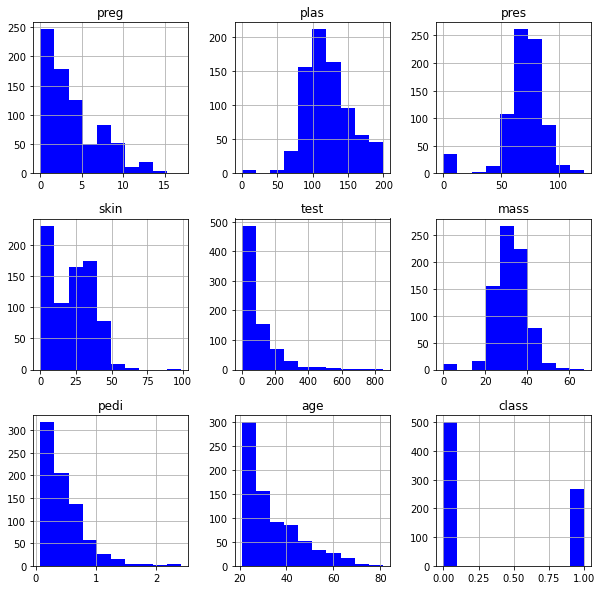

In [10]:
# Univariate Histograms
from matplotlib import pyplot
from pandas import read_csv
filename = 'pima-indians-diabetes_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.hist(figsize = [10, 10], color = 'b')
pyplot.show()

You can see that perhaps the attributes $\texttt{age, pedi}$ and $\texttt{test}$ may have an exponential
distribution. We can also see that perhaps the $\texttt{mass}$ and $\texttt{pres}$ and $\texttt{plas}$ attributes may have a
Gaussian or nearly Gaussian distribution. This is interesting because many machine learning
techniques assume a Gaussian univariate distribution on the input variables

#### Density Plots

Density plots are another way of getting a quick idea of the distribution of each attribute. The
plots look like an abstracted histogram with a smooth curve drawn through the top of each bin,
much like your eye tried to do with the histograms. Findout the density of each attribute and plot them. 

(hint : use $\texttt{data.plot}$ function.)

D:\Programs\miniconda3\envs\prml\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


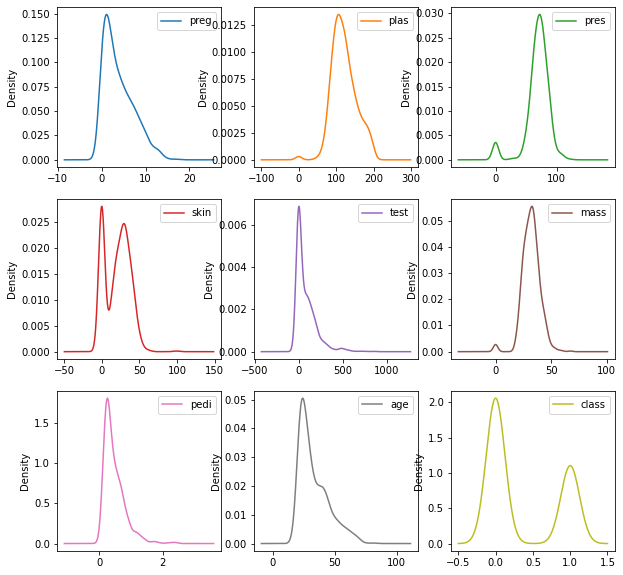

In [11]:
# Univariate Density Plots (Your code solution)
from matplotlib import pyplot
from pandas import read_csv
filename = 'pima-indians-diabetes_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.plot.density(figsize = [10, 10], subplots = True, layout = (3, 3), sharex = False)
pyplot.show()

We can see the distribution for each attribute is clearer than the histograms.


#### Box and Whisker Plots


Another useful way to review the distribution of each attribute is to use Box and Whisker Plots
or boxplots for short. Boxplots summarize the distribution of each attribute, drawing a line for
the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of
the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers
show candidate outlier values (values that are 1.5 times greater than the size of spread of the
middle 50% of the data).
Compute and plot the box plots for the data.

(hint: explore the $\texttt{kind}$ argument in $\texttt{data.plot}$ function)

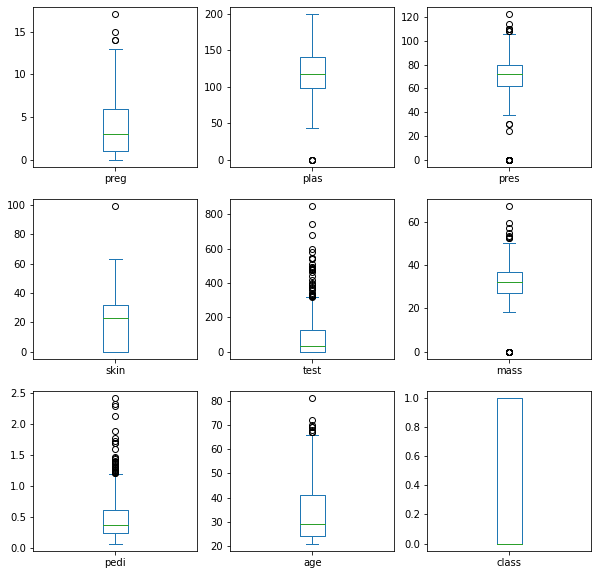

In [12]:
# Box Plots (Your code solution)
from matplotlib import pyplot
from pandas import read_csv
filename = 'pima-indians-diabetes_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
data.plot.box(figsize = [10, 10], subplots = True, layout = (3, 3), sharex = False)
pyplot.show()

###  Multivariate Plots


This subsection provides examples of two plots that show the interactions between multiple variables
in your dataset.
- Correlation Matrix Plot.
- Scatter Plot Matrix.

#### Correlation Matrix Plot


Correlation gives an indication of how related the changes are between two variables. If two
variables change in the same direction they are positively correlated. If they change in opposite
directions together (one goes up, one goes down), then they are negatively correlated. You can
calculate the correlation between each pair of attributes. This is called a correlation matrix. You
can then plot the correlation matrix and get an idea of which variables have a high correlation with each other. This is useful to know, because some machine learning algorithms like linear
and logistic regression can have poor performance if there are highly correlated input variables
in your data.


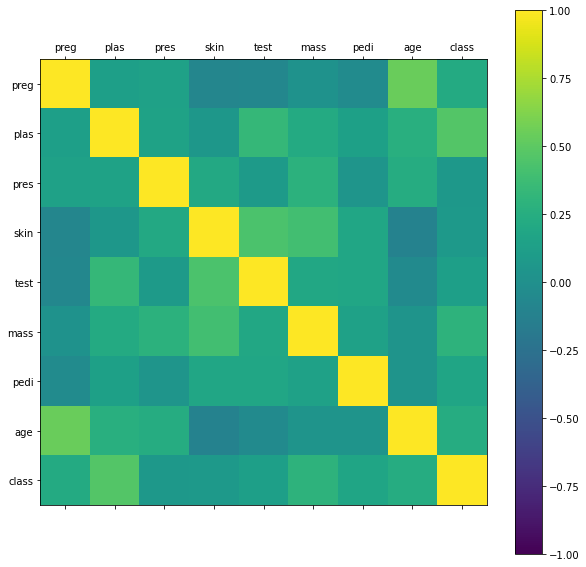

In [13]:
# Correction Matrix Plot
from matplotlib import pyplot
from pandas import read_csv
import numpy
filename = 'pima-indians-diabetes_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
correlations = data.corr()
# plot correlation matrix
fig = pyplot.figure(figsize = [10, 10])
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

We can see that the matrix is symmetrical, i.e. the bottom left of the matrix is the same as
the top right. This is useful as we can see two different views on the same data in one plot. We
can also see that each variable is perfectly positively correlated with each other (as you would
have expected) in the diagonal line from top left to bottom right.


The example is not generic in that it specifies the names for the attributes along the axes as
well as the number of ticks. This recipe cam be made more generic by removing the axes labes and ticks.

####  Scatter Plot Matrix

A scatter plot shows the relationship between two variables as dots in two dimensions, one
axis for each attribute. You can create a scatter plot for each pair of attributes in your data.
Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful
for spotting structured relationships between variables, like whether you could summarize the
relationship between two variables with a line. Attributes with structured relationships may
also be correlated and good candidates for removal from your dataset.
Compute and plot the scatter plot matrix of the data. 

(hint: Use $\texttt{scatter_matrix}$ module in $\texttt{pandas}$)

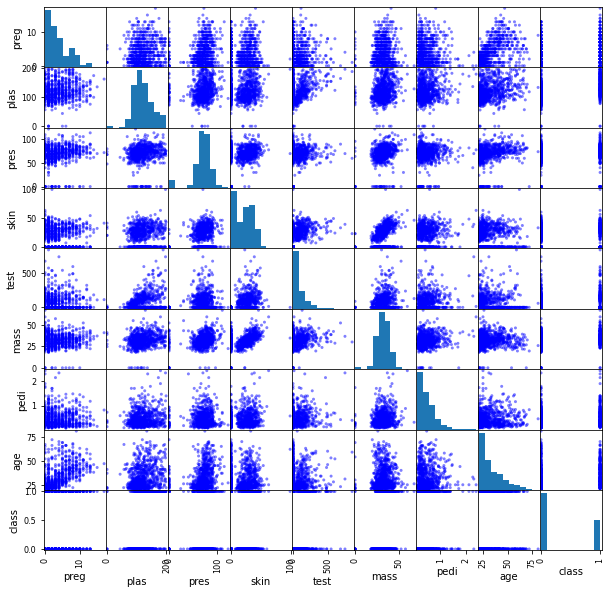

In [14]:
# Scatterplot Matrix (Your code solution)
from matplotlib import pyplot
from pandas import read_csv
import pandas as pd
filename = 'pima-indians-diabetes_data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(filename, names=names)
pd.plotting.scatter_matrix(data, alpha = 0.5, figsize = [10, 10], c = "blue")
pyplot.show()

Like the Correlation Matrix Plot above, the scatter plot matrix is symmetrical. This is
useful to look at the pairwise relationships from different perspectives. Because there is little
point of drawing a scatter plot of each variable with itself, the diagonal shows histograms of
each attribute.

### Summary

In this section you discovered a number of ways that you can better understand your machine learning data in Python using Pandas. Specifically, you learned how to plot your data using:
- Histograms.
- Density Plots.
- Box and Whisker Plots.
- Correlation Matrix Plot.
- Scatter Plot Matrix